<a href="https://colab.research.google.com/github/shiyasAli/Bike-sharing-demand-prediction/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm


In [168]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [237]:
file_path="/content/drive/MyDrive/Colab Notebooks/Almabetter/Supervised ML_Capastone/SeoulBikeData.csv"
df=pd.read_csv(file_path,encoding='unicode_escape')

In [238]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [171]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [172]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [239]:
df_new=df.copy()

In [175]:
df_new.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [176]:
feature_list=list(df.columns)
feature_list

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [177]:
number_of_features=len(feature_list)
number_of_features

14

In [178]:
quantitative_feature_list=feature_list[1:11]
quantitative_feature_list

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [179]:
number_of_quantitative_features=len(quantitative_feature_list)
number_of_quantitative_features

10

In [180]:
df.isnull().sum().reset_index().rename(columns={"index":"Feature",0:"Null_count"})

,Feature,Null_count
0,Date,0
1,Rented Bike Count,0
2,Hour,0
3,Temperature(°C),0
4,Humidity(%),0
5,Wind speed (m/s),0
6,Visibility (10m),0
7,Dew point temperature(°C),0
8,Solar Radiation (MJ/m2),0
9,Rainfall(mm),0


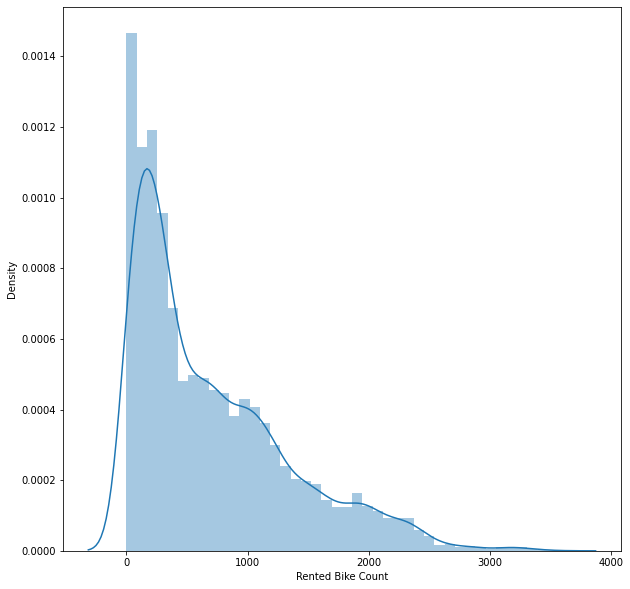

In [181]:
sns.distplot(df["Rented Bike Count"])

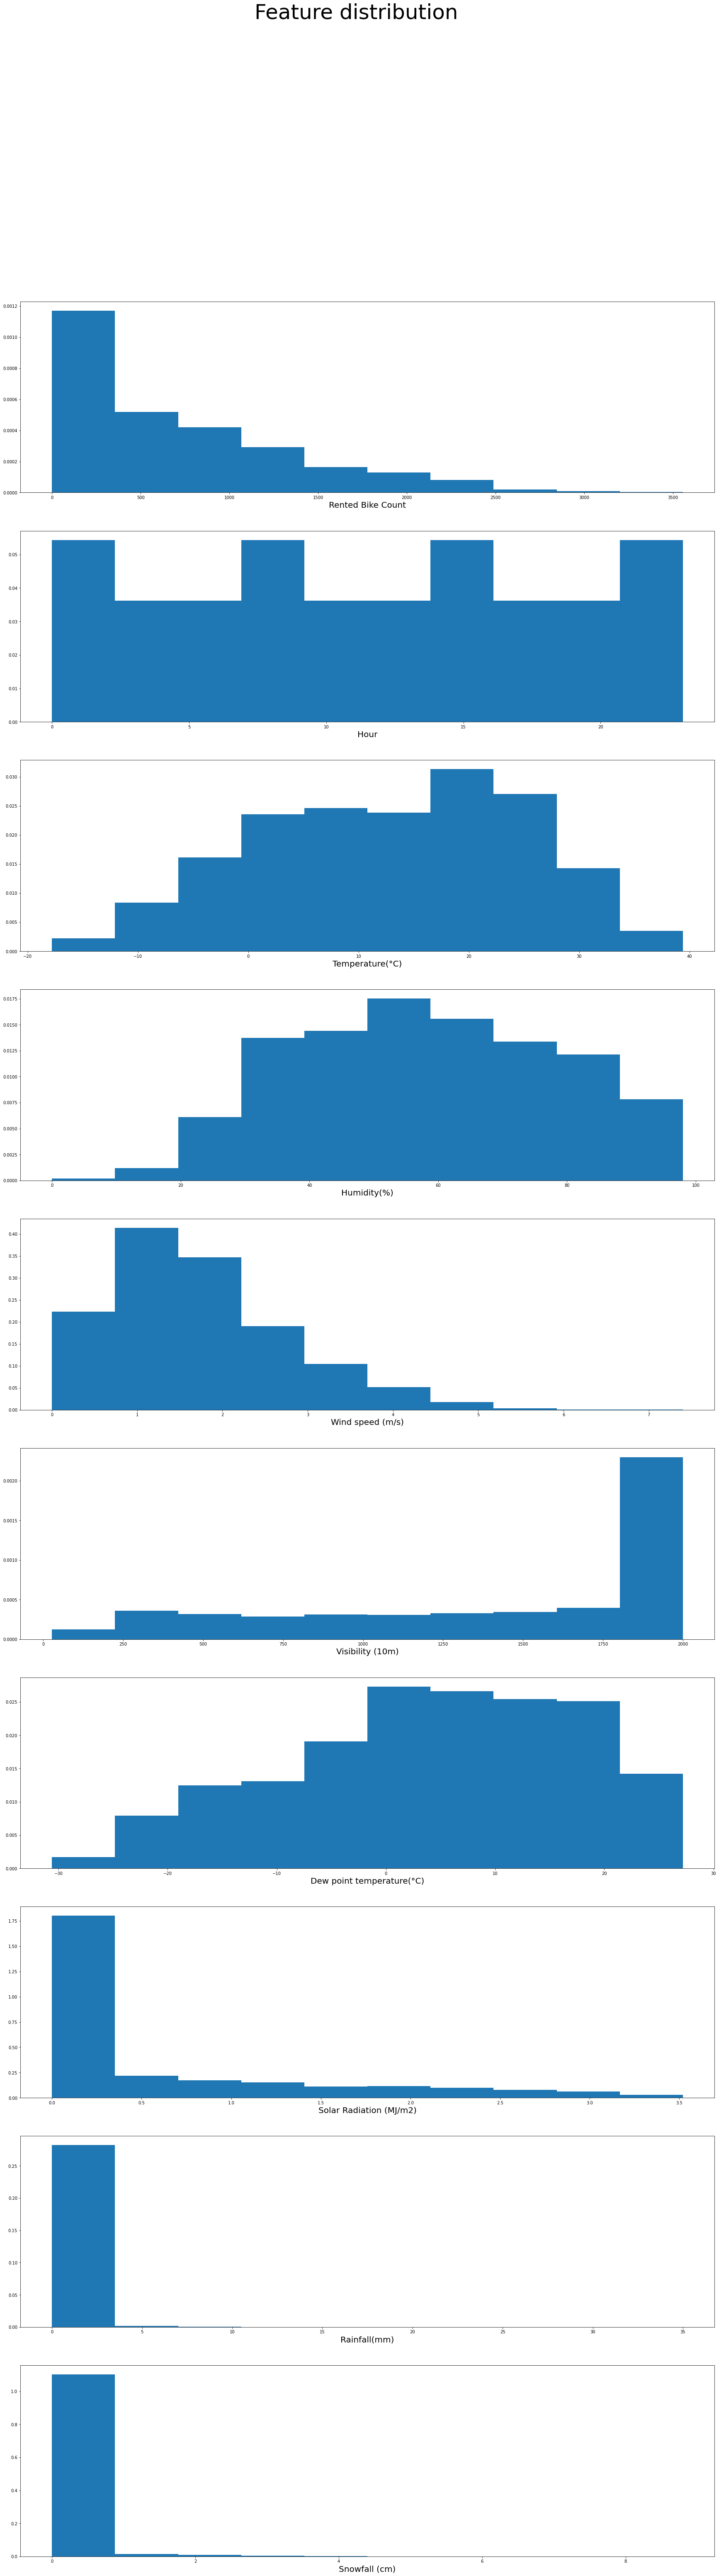

In [183]:
fig,ax=plt.subplots(number_of_quantitative_features,1)
plt.suptitle("Feature distribution",fontsize=50)
plt.rcParams['figure.figsize']=(30,100)
for index,feature in enumerate(quantitative_feature_list):
  ax[index].hist(df[feature],density=True)
  ax[index].set_xlabel(feature,fontsize=20)
plt.show()

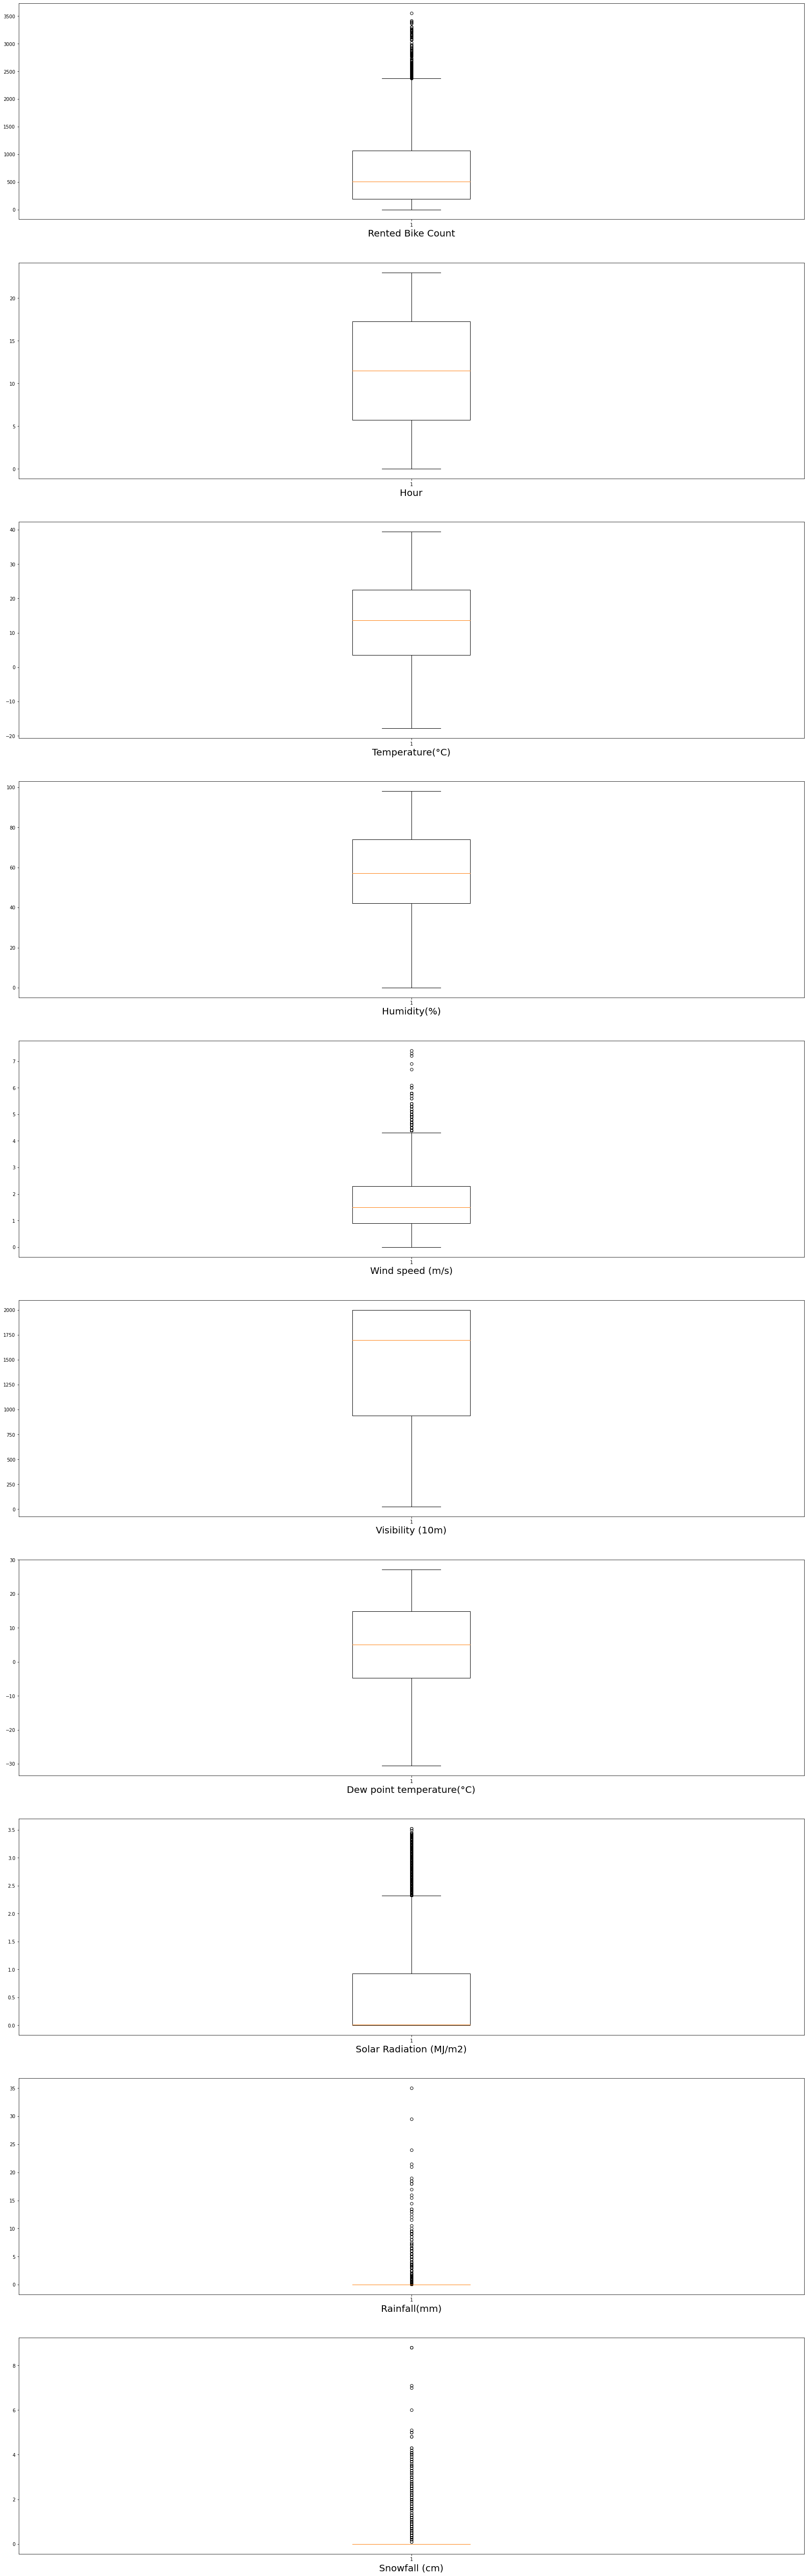

In [184]:
plt.rcParams['figure.figsize']=(30,100)
for index,feature in enumerate(quantitative_feature_list):
  plt.subplot(number_of_quantitative_features,1,index+1)
  plt.boxplot(df[feature])
  plt.xlabel(feature,fontsize=20)

In [111]:
df['Rainfall(mm)'].value_counts().reset_index().sort_values('index')

,index,Rainfall(mm)
0,0.0,8232
4,0.1,46
7,0.2,20
12,0.3,9
9,0.4,16
...,...,...
39,21.0,1
40,21.5,1
34,24.0,1
38,29.5,1


In [112]:
df['Snowfall (cm)'].value_counts().reset_index().sort_values('index')

,index,Snowfall (cm)
0,0.0,8317
37,0.1,2
11,0.2,15
1,0.3,42
8,0.4,21
4,0.5,34
12,0.6,15
5,0.7,31
6,0.8,22
3,0.9,34


In [113]:
df['Solar Radiation (MJ/m2)'].value_counts().reset_index().sort_values('index')

,index,Solar Radiation (MJ/m2)
0,0.00,4300
1,0.01,128
2,0.02,82
3,0.03,69
6,0.04,47
...,...,...
307,3.42,4
342,3.44,1
344,3.45,1
343,3.49,1


In [240]:
df['Rainfall(mm)']=df['Rainfall(mm)'].apply(lambda x:0 if x==0 else 1)
df['Snowfall (cm)']=df['Snowfall (cm)'].apply(lambda x:0 if x==0 else 1)

In [186]:
dependent_variable='Rented Bike Count'
independent_variables=[i for i in feature_list if i != dependent_variable]
print(independent_variables)
quantitative_independent_variables=[i for i in quantitative_feature_list if i != dependent_variable]
print(quantitative_independent_variables)
categorical_independent_variables=[i for i in independent_variables if ((i not in quantitative_independent_variables) and (i != 'Date'))]
print(categorical_independent_variables)

['Date', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']
['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
['Seasons', 'Holiday', 'Functioning Day']


<function matplotlib.pyplot.show>

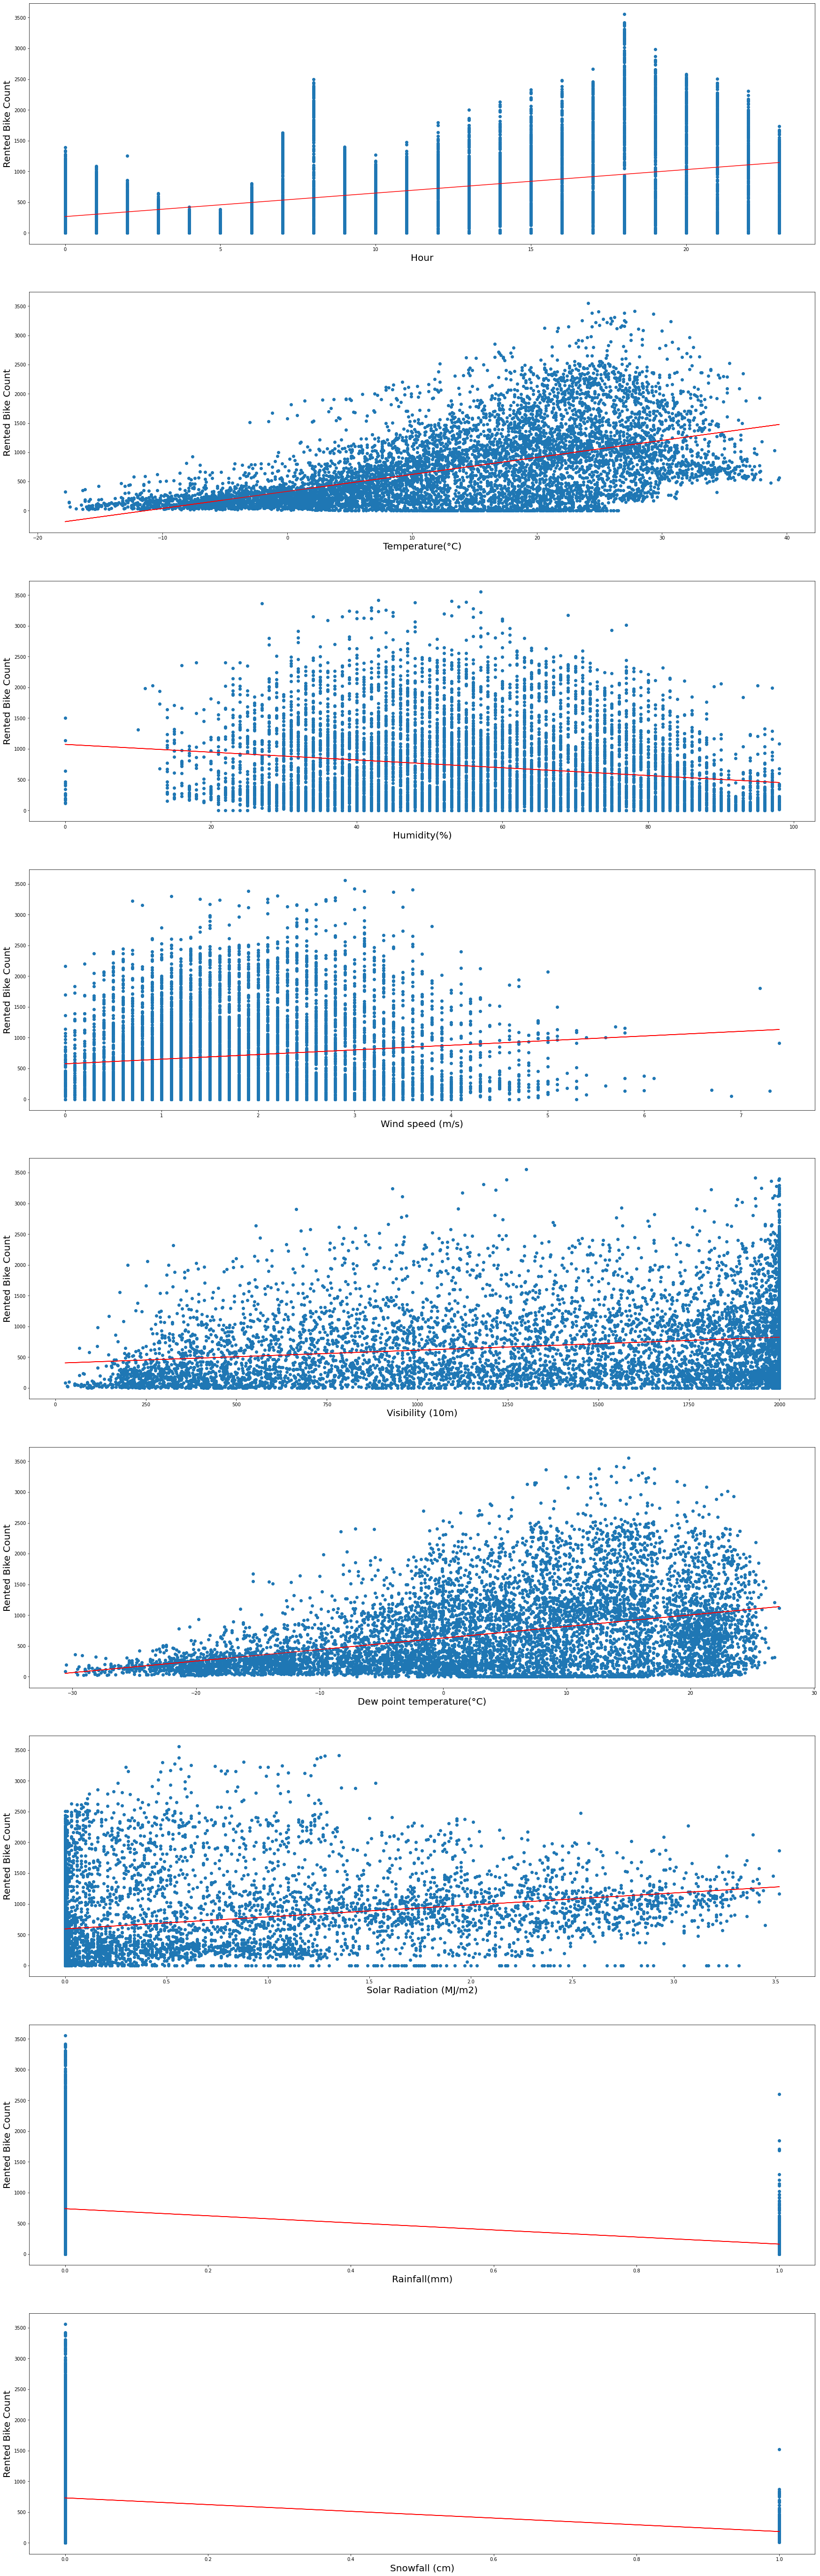

In [187]:
fig,ax=plt.subplots(len(quantitative_independent_variables),1)
plt.rcParams['figure.figsize']=(30,100)
for index,feature in enumerate(quantitative_independent_variables):
  m,b=np.polyfit(df[feature],df[dependent_variable],1)
  ax[index].scatter(df[feature],df[dependent_variable])
  ax[index].plot(df[feature],m*df[feature]+b,color='red')
  ax[index].set_xlabel(feature,fontsize=20)
  ax[index].set_ylabel(dependent_variable,fontsize=20)
plt.show

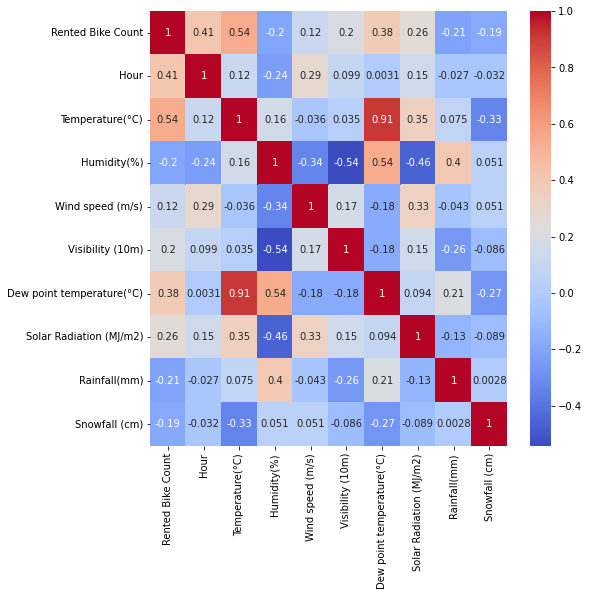

In [188]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

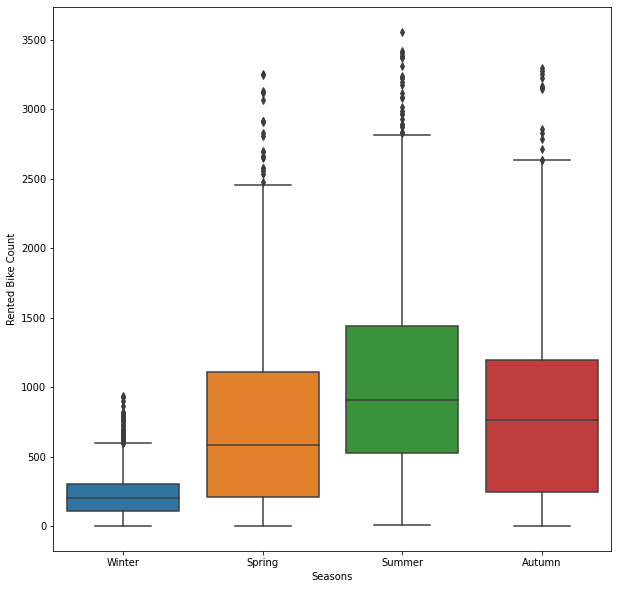

In [189]:
plt.rcParams['figure.figsize']=(10,10)
sns.boxplot(x=df['Seasons'],y=df['Rented Bike Count'])

In [190]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

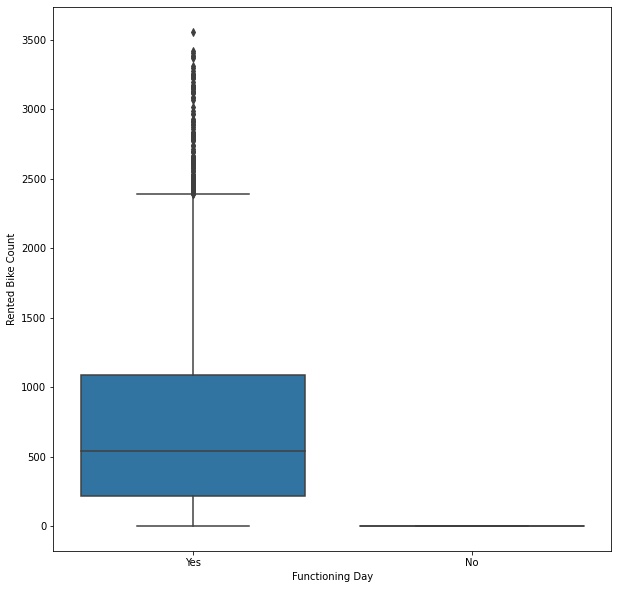

In [191]:
plt.rcParams['figure.figsize']=(10,10)
sns.boxplot(x=df['Functioning Day'],y=df['Rented Bike Count'])

In [192]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

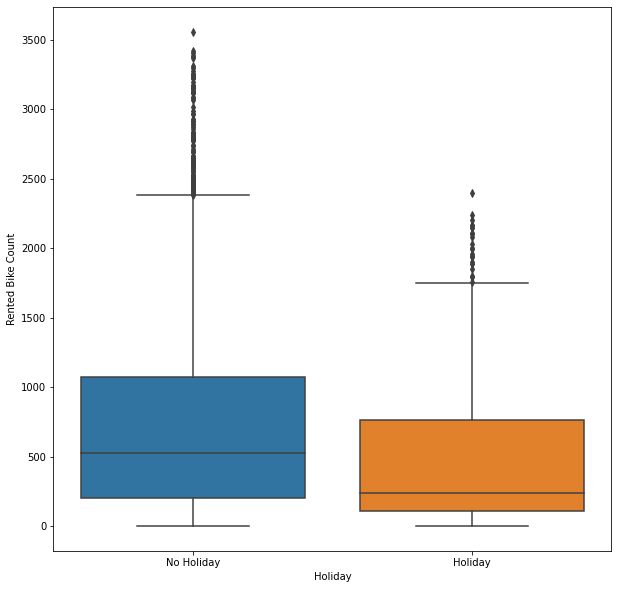

In [193]:
plt.rcParams['figure.figsize']=(10,10)
sns.boxplot(x=df['Holiday'],y=df['Rented Bike Count'])

In [194]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [241]:
df['Holiday']=df['Holiday'].apply(lambda x:0 if x=='Holiday' else 1)
df['Functioning Day']=df["Functioning Day"].apply(lambda x:0 if x=='No' else 1)
df['Seasons']=df['Seasons'].apply(lambda x:0 if x=='Winter' else 1)

In [196]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,0,1,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,0,1,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,0,1,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,0,1,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,0,1,1


In [197]:
df[['Holiday','Functioning Day']].corr()

,Holiday,Functioning Day
Holiday,1.000000,0.027624
Functioning Day,0.027624,1.000000


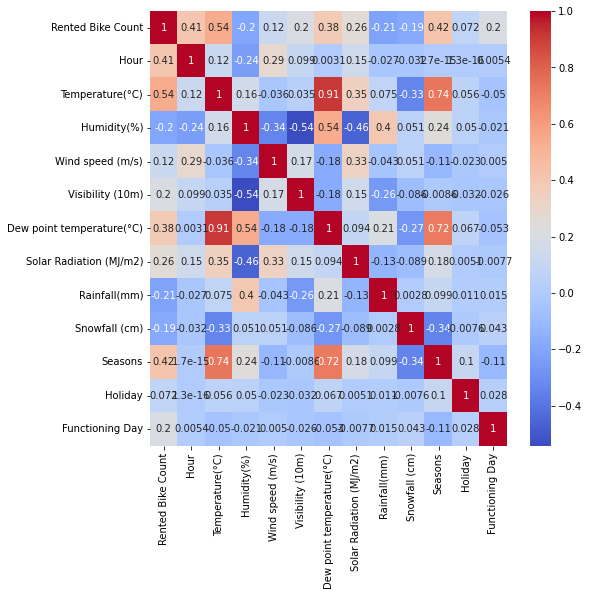

In [198]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [242]:
df['sin_hr']=df['Hour'].apply(lambda x:np.sin((2*np.pi*x)/24))
df['cos_hr']=df['Hour'].apply(lambda x:np.cos((2*np.pi*x)/24))

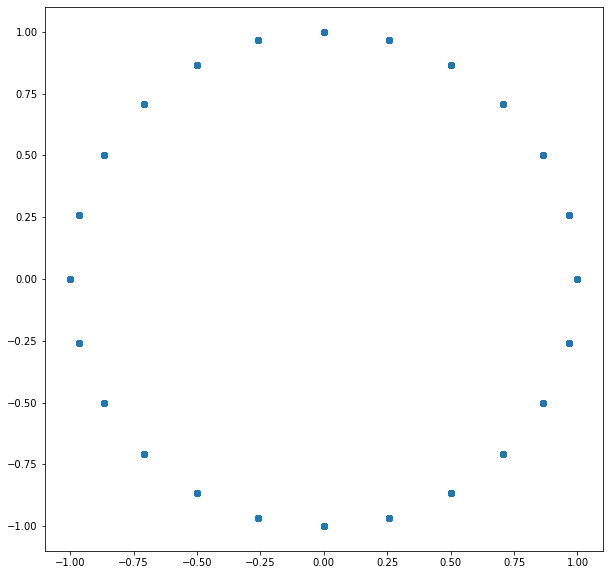

In [200]:
plt.figure.figsize=(10,10)
plt.scatter(df['sin_hr'],df['cos_hr'])

In [249]:
y=df[dependent_variable]


In [202]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,sin_hr,cos_hr
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,0,1,1,0.000000,1.000000
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,0,1,1,0.258819,0.965926
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,0,1,1,0.500000,0.866025
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,0,1,1,0.707107,0.707107
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,0,1,1,0.866025,0.500000


In [246]:
X=df[['Temperature(°C)','Functioning Day','sin_hr','cos_hr','Humidity(%)','Rainfall(mm)','Snowfall (cm)','Wind speed (m/s)','Solar Radiation (MJ/m2)','Visibility (10m)','Seasons']]

In [247]:
VIF_df=pd.DataFrame()
VIF_df['features']=X.columns
VIF_df['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(VIF_df)

                   features        VIF
0           Temperature(°C)   6.084467
1           Functioning Day  18.042781
2                    sin_hr   1.419885
3                    cos_hr   2.237730
4               Humidity(%)  14.678182
5              Rainfall(mm)   1.286023
6             Snowfall (cm)   1.259737
7          Wind speed (m/s)   4.937877
8   Solar Radiation (MJ/m2)   4.392786
9          Visibility (10m)   6.878130
10                  Seasons   9.603418


In [250]:
y=y.values
X=X.values

In [251]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [252]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [253]:
lm1 = LinearRegression()
lm1.fit(X_train, y_train)

LinearRegression()

In [254]:
y_pred_train=lm1.predict(X_train)
y_pred_train

array([ 533.95168229, 1503.06381228,  671.7428486 , ...,  824.38166508,
        730.76174942,  840.89336045])

In [255]:
r2_score(y_train,y_pred_train)

0.5675853706187196

In [256]:
y_pred=lm1.predict(X_test)

In [257]:
r2_score(y_test,y_pred)

0.5552741147152966

In [258]:
X_train_ols1=sm.add_constant(X_train)
model1=sm.OLS(y_train,X_train_ols1).fit()

In [259]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     834.8
Date:                Sat, 13 Aug 2022   Prob (F-statistic):               0.00
Time:                        08:16:13   Log-Likelihood:                -52336.
No. Observations:                7008   AIC:                         1.047e+05
Df Residuals:                    6996   BIC:                         1.048e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -352.0697     47.372     -7.432      0.0

In [244]:
df1=df_new.copy()

In [245]:
df1['Rainfall(mm)']=df1['Rainfall(mm)'].apply(lambda x:0 if x==0 else 1)
df1['Snowfall (cm)']=df1['Snowfall (cm)'].apply(lambda x:0 if x==0 else 1)
df1['Holiday']=df1['Holiday'].apply(lambda x:0 if x=='Holiday' else 1)
df1['Functioning Day']=df1["Functioning Day"].apply(lambda x:0 if x=='No' else 1)
df1['sin_hr']=df1['Hour'].apply(lambda x:np.sin((2*np.pi*x)/24))
df1['cos_hr']=df1['Hour'].apply(lambda x:np.cos((2*np.pi*x)/24))

In [261]:
df1.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,sin_hr,cos_hr
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,1,1,0.000000,1.000000
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,1,1,0.258819,0.965926
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,1,1,0.500000,0.866025
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,1,1,0.707107,0.707107
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,1,1,0.866025,0.500000


In [262]:
X=df1[['Temperature(°C)','Functioning Day','sin_hr','cos_hr','Humidity(%)','Rainfall(mm)','Snowfall (cm)','Wind speed (m/s)','Solar Radiation (MJ/m2)','Visibility (10m)','Seasons']]

In [263]:
X.head()

,Temperature(°C),Functioning Day,sin_hr,cos_hr,Humidity(%),Rainfall(mm),Snowfall (cm),Wind speed (m/s),Solar Radiation (MJ/m2),Visibility (10m),Seasons
0,-5.2,1,0.000000,1.000000,37,0,0,2.2,0.0,2000,Winter
1,-5.5,1,0.258819,0.965926,38,0,0,0.8,0.0,2000,Winter
2,-6.0,1,0.500000,0.866025,39,0,0,1.0,0.0,2000,Winter
3,-6.2,1,0.707107,0.707107,40,0,0,0.9,0.0,2000,Winter
4,-6.0,1,0.866025,0.500000,36,0,0,2.3,0.0,2000,Winter


In [266]:
X=pd.get_dummies(X)

In [267]:
X.head()

,Temperature(°C),Functioning Day,sin_hr,cos_hr,Humidity(%),Rainfall(mm),Snowfall (cm),Wind speed (m/s),Solar Radiation (MJ/m2),Visibility (10m),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,-5.2,1,0.000000,1.000000,37,0,0,2.2,0.0,2000,0,0,0,1
1,-5.5,1,0.258819,0.965926,38,0,0,0.8,0.0,2000,0,0,0,1
2,-6.0,1,0.500000,0.866025,39,0,0,1.0,0.0,2000,0,0,0,1
3,-6.2,1,0.707107,0.707107,40,0,0,0.9,0.0,2000,0,0,0,1
4,-6.0,1,0.866025,0.500000,36,0,0,2.3,0.0,2000,0,0,0,1


In [268]:
VIF_df=pd.DataFrame()
VIF_df['features']=X.columns
VIF_df['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(VIF_df)

                   features        VIF
0           Temperature(°C)   5.479720
1           Functioning Day   1.080583
2                    sin_hr   1.504123
3                    cos_hr   2.276456
4               Humidity(%)   2.929697
5              Rainfall(mm)   1.238938
6             Snowfall (cm)   1.208891
7          Wind speed (m/s)   1.395786
8   Solar Radiation (MJ/m2)   3.348970
9          Visibility (10m)   1.705378
10           Seasons_Autumn  24.208462
11           Seasons_Spring  24.454697
12           Seasons_Summer  32.237785
13           Seasons_Winter  21.309527


In [269]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [270]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [271]:
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

LinearRegression()

In [273]:
y_pred_train=lm2.predict(X_train)
y_pred_train

array([ 549. , 1480.5,  656. , ...,  819. ,  690.5,  812.5])

In [274]:
r2_score(y_train,y_pred_train)

0.5701221648809373

In [275]:
X_train_ols2=sm.add_constant(X_train)
model2=sm.OLS(y_train,X_train_ols2).fit()

In [276]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     713.6
Date:                Sat, 13 Aug 2022   Prob (F-statistic):               0.00
Time:                        08:28:07   Log-Likelihood:                -52315.
No. Observations:                7008   AIC:                         1.047e+05
Df Residuals:                    6994   BIC:                         1.048e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -126.8860     47.249     -2.685      0.0